In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.datasets import cifar10

In [ ]:
# loading the Cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
# hyper parameters
batch_size = 64
num_classes = 10
epochs = 20
learning_rate = 0.002

# input image dimensions
img_rows, img_cols = 32, 32

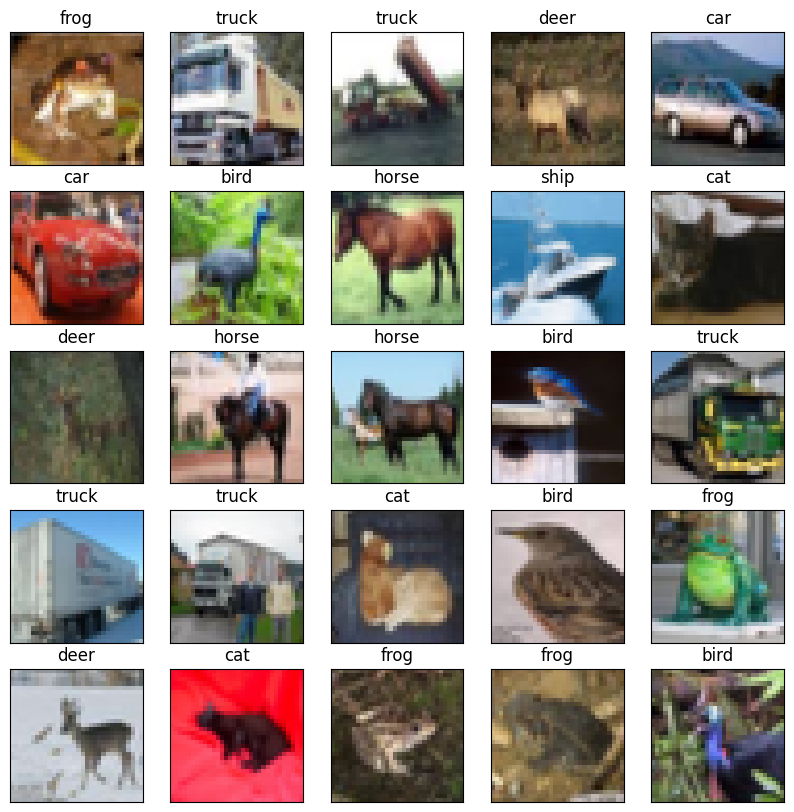

In [ ]:
# Assign the class names
class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot some images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])

    plt.title(class_names[y_train[i][0]])
plt.show()

In [ ]:
# convert labels to OHE vectors for the output
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

## Create model

In [ ]:
# compile the model
# loss: categorical_crossentropy because the targets are one-hot encoded
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.4482 - loss: 1.5701 - val_accuracy: 0.6181 - val_loss: 1.0948
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6829 - loss: 0.9042 - val_accuracy: 0.6902 - val_loss: 0.9009
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7495 - loss: 0.7223 - val_accuracy: 0.7393 - val_loss: 0.7529
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7904 - loss: 0.6059 - val_accuracy: 0.7456 - val_loss: 0.7350
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8204 - loss: 0.5158 - val_accuracy: 0.7741 - val_loss: 0.6756
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8499 - loss: 0.4330 - val_accuracy: 0.7782 - val_loss: 0.6801
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8705 - loss: 0.3679 - val_accuracy: 0.7641 - val_loss: 0.7314
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8888 - loss: 0.3134 

In [ ]:
# make some predictions
preds = model.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


In [ ]:
# look at a single prediction
preds[0]

array([1.1525671e-04, 5.3821706e-05, 1.4680187e-03, 9.5288652e-01,
       3.0495694e-03, 1.9608924e-02, 2.1554997e-02, 1.8499598e-04,
       9.2974427e-04, 1.4795741e-04], dtype=float32)

In [ ]:
# convert the labels
np.argmax(y_test[:10],axis=1)

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

In [ ]:
# CNN model predictions
np.argmax(preds,axis=1)

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 9])